# Multiple regression of `mpg` on numerical features in `auto`

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-dataset" data-toc-modified-id="Preparing-the-dataset-1">Preparing the dataset</a></span></li><li><span><a href="#(a)-Scatterplot-matrix-of-auto" data-toc-modified-id="(a)-Scatterplot-matrix-of-auto-2">(a) Scatterplot matrix of <code>auto</code></a></span></li><li><span><a href="#(b)-Correlation-matrix-of-auto" data-toc-modified-id="(b)-Correlation-matrix-of-auto-3">(b) Correlation matrix of <code>auto</code></a></span></li><li><span><a href="#(c)-Fitting-the-model" data-toc-modified-id="(c)-Fitting-the-model-4">(c) Fitting the model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#i.-Is-there-a-relationship-between-the-predictors-and-the-mpg?" data-toc-modified-id="i.-Is-there-a-relationship-between-the-predictors-and-the-mpg?-4.0.1">i. Is there a relationship between the predictors and the <code>mpg</code>?</a></span></li><li><span><a href="#ii.-Which-predictors-appear-to-have-a-statistically-significant-relationship-to-the-response?" data-toc-modified-id="ii.-Which-predictors-appear-to-have-a-statistically-significant-relationship-to-the-response?-4.0.2">ii. Which predictors appear to have a statistically significant relationship to the response?</a></span></li><li><span><a href="#(iii)-What-does-the-coefficient-for-the-year-variable-suggest?" data-toc-modified-id="(iii)-What-does-the-coefficient-for-the-year-variable-suggest?-4.0.3">(iii) What does the coefficient for the year variable suggest?</a></span></li></ul></li></ul></li><li><span><a href="#(d)-Diagnostic-plots" data-toc-modified-id="(d)-Diagnostic-plots-5">(d) Diagnostic plots</a></span><ul class="toc-item"><li><span><a href="#Standardized-residuals-vs-fitted-value" data-toc-modified-id="Standardized-residuals-vs-fitted-value-5.1">Standardized residuals vs fitted value</a></span></li><li><span><a href="#Standardized-residuals-QQ-plot" data-toc-modified-id="Standardized-residuals-QQ-plot-5.2">Standardized residuals QQ-plot</a></span></li><li><span><a href="#Scale-location-plot" data-toc-modified-id="Scale-location-plot-5.3">Scale-location plot</a></span></li><li><span><a href="#Influence-Plot" data-toc-modified-id="Influence-Plot-5.4">Influence Plot</a></span></li></ul></li><li><span><a href="#(e)-Interaction-effects" data-toc-modified-id="(e)-Interaction-effects-6">(e) Interaction effects</a></span></li><li><span><a href="#(f)-Variable-transformations" data-toc-modified-id="(f)-Variable-transformations-7">(f) Variable transformations</a></span><ul class="toc-item"><li><span><a href="#The-$\log(X)$-model" data-toc-modified-id="The-$\log(X)$-model-7.1">The $\log(X)$ model</a></span></li><li><span><a href="#The-$\sqrt{X}$-model" data-toc-modified-id="The-$\sqrt{X}$-model-7.2">The $\sqrt{X}$ model</a></span></li><li><span><a href="#The-$X^2$-model" data-toc-modified-id="The-$X^2$-model-7.3">The $X^2$ model</a></span></li></ul></li></ul></div>

## Preparing the dataset

Import pandas, load the `Auto` dataset, and inspect

In [3]:
import numpy as np
import pandas as pd

auto = pd.read_csv('../../datasets/Auto.csv')
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
Unnamed: 0      392 non-null int64
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 30.7+ KB


There are missing values represented by `'?'` in  `horsepower`. We'll impute these by using mean values for the `cylinders` class

In [5]:
# replace `?` with nans
auto.loc[:, 'horsepower'].apply(lambda x: np.nan if x == '?' else x)

# cast horsepower to numeric dtype
auto.loc[:, 'horsepower'] = pd.to_numeric(auto.horsepower)

# now impute values
auto.loc[:, 'horsepower'] = auto.horsepower.fillna(auto.horsepower.mean())

In [6]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
Unnamed: 0      392 non-null int64
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 30.7+ KB


## (a) Scatterplot matrix of `auto`

In [5]:
# setup
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')
sns.set_style('white')

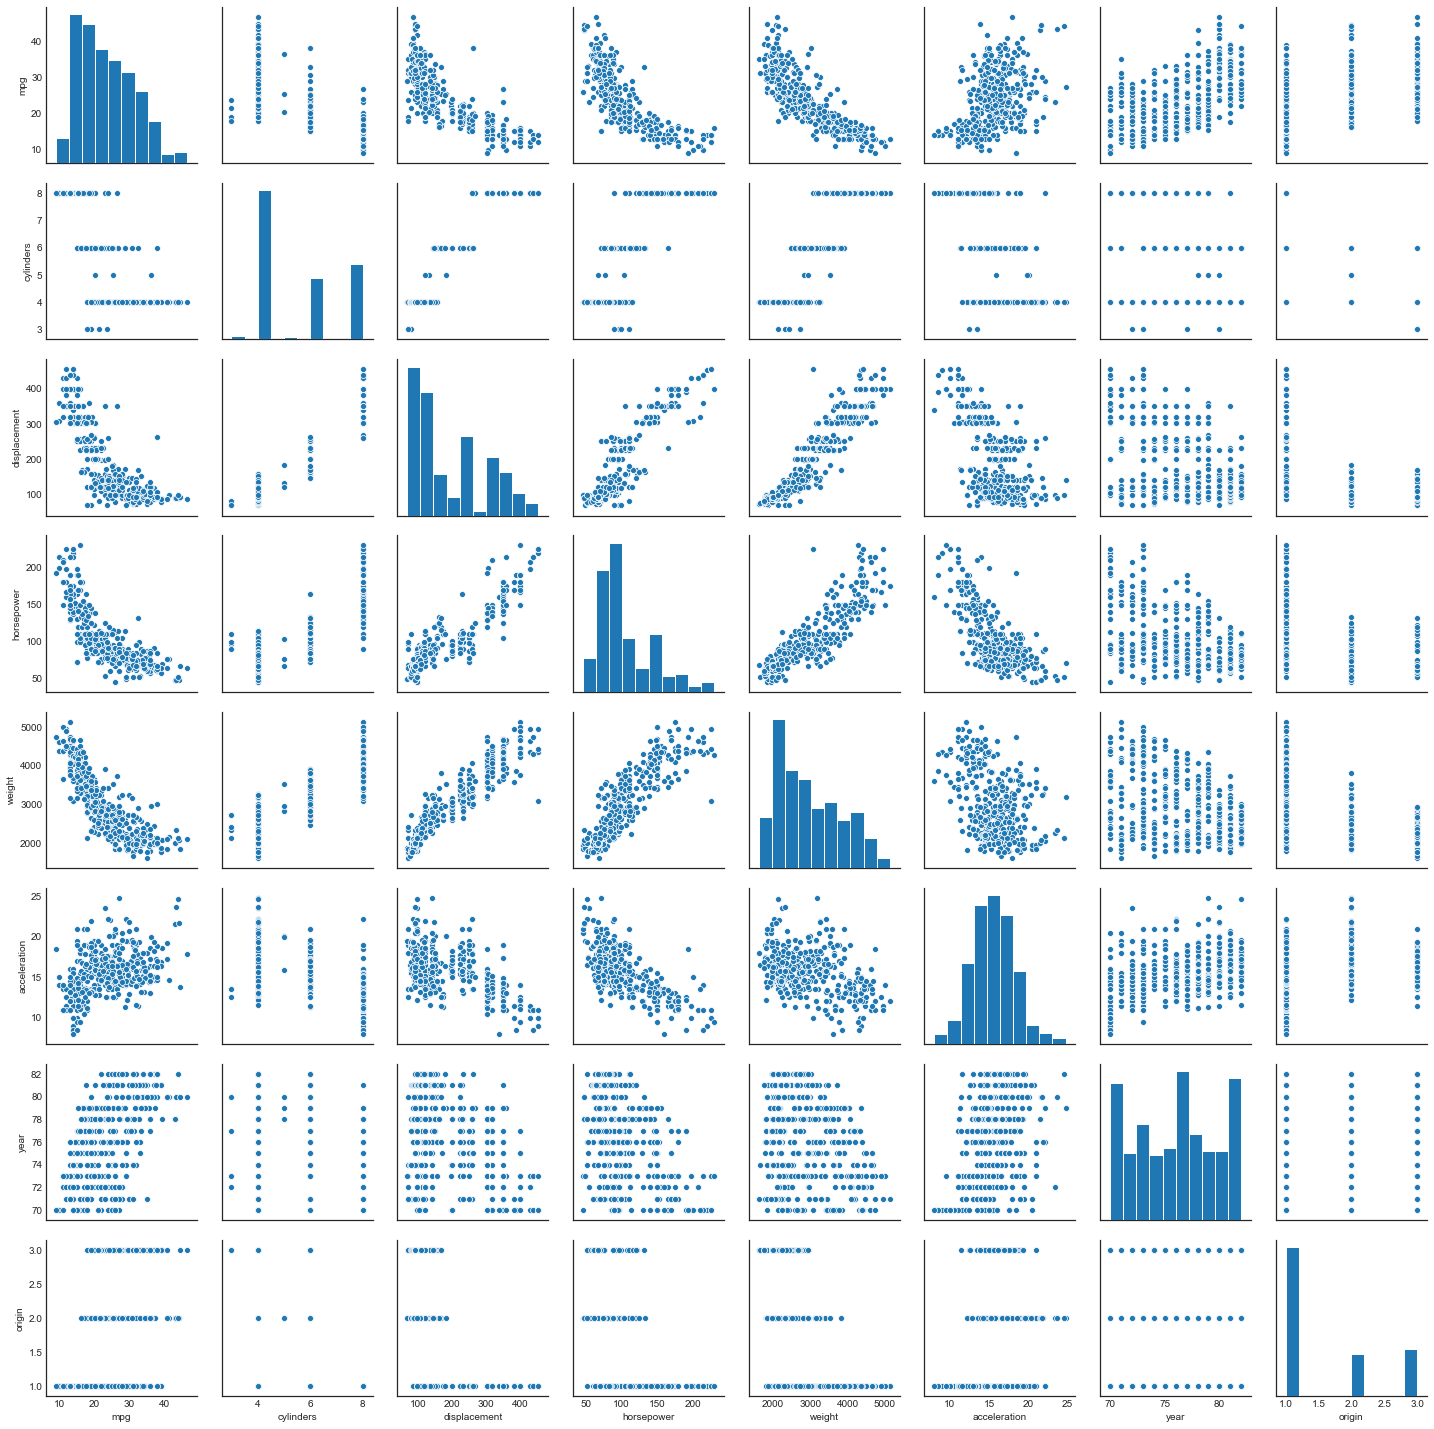

In [6]:
sns.pairplot(auto.dropna())

## (b) Correlation matrix of `auto`

Compute the correlation matrix of the numerical variables

In [7]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.776230,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.843640,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897584,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.776230,0.843640,0.897584,1.000000,0.864320,-0.688223,-0.415617,-0.451925
weight,-0.831739,0.897017,0.933104,0.864320,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.688223,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.415617,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.451925,-0.581265,0.210084,0.184314,1.000000


## (c) Fitting the model

In [8]:
import statsmodels.api as sm

# drop non-numerical columns and rows with null entries
model_df = auto.drop(['name'], axis=1).dropna()
X, Y = model_df.drop(['mpg'], axis=1), model_df.mpg

# add constant
X = sm.add_constant(X)

# create and fit model
model = sm.OLS(Y, X).fit()

# show results summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.4
Date:                Sun, 28 Oct 2018   Prob (F-statistic):          1.89e-141
Time:                        19:28:06   Log-Likelihood:                -1037.2
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2122.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.0900      4.629     -3.908      0.000     -27.191      -8.989
cylinders       -0.4560      0.322     -1.414      0.158      -1.090       0.178
displacement     0.0196      0.008      2.608      0.009       0.005       0.034
horsepower      -0.0136      0.014     -0.993      0.321      -0.040       0.013
weight          -0.0066      0.001    -10.304      0.000      -0.008      -0.005
acceleration     0.0998      0.098      1.021      0.308      -0.092       0.292
year             0.7587      0.051     14.969      0.000       0.659       0.858
origin           1.4199      0.277      5.132      0.000       0.876       1.964
==============================================================================
Omnibus:                       30.088   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.301
Skew:                           0.511   Prob(JB):                     3.25e-11
Kurtosis:                       4.370   Cond. No.                     8.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### i. Is there a relationship between the predictors and the `mpg`?

This question is answered by the $p$-value of the $F$-statistic

In [9]:
model.f_pvalue

1.8936359873496686e-141

This is effectively zero, so the answer is yes

#### ii. Which predictors appear to have a statistically significant relationship to the response?

This is answered by the $p$-values of the individual predictors

In [10]:
model.pvalues

const           1.097017e-04
cylinders       1.580259e-01
displacement    9.455004e-03
horsepower      3.212038e-01
weight          3.578587e-22
acceleration    3.077592e-01
year            2.502539e-40
origin          4.530034e-07
dtype: float64

A common cutoff is a $p$-value of 0.05, so by this standard, the predictors with a statistically significant relationship to `mpg` are

In [11]:
is_stat_sig = model.pvalues < 0.05
model.pvalues[is_stat_sig]

const           1.097017e-04
displacement    9.455004e-03
weight          3.578587e-22
year            2.502539e-40
origin          4.530034e-07
dtype: float64

And those which do not are

In [12]:
model.pvalues[~ is_stat_sig]

cylinders       0.158026
horsepower      0.321204
acceleration    0.307759
dtype: float64

This is surprising<sup><a href='#foot1' id='ref1'>1</a></sup>, since we found a statistically significant relationship between `horsepower` and `mpg` in [problem 8](#problem-8). 

#### (iii) What does the coefficient for the year variable suggest?

That fuel efficiency has been improving over time

## (d) Diagnostic plots

First we assemble the results in a dataframe and clean up a bit

In [13]:
# get full prediction results
pred_df = model.get_prediction().summary_frame()

# rename columns to avoid `mean` name conflicts and other confusions
new_names = {}
for name in pred_df.columns:
    if 'mean' in name:
        new_names[name] = name.replace('mean', 'mpg_pred')
    elif 'obs_ci' in name:
        new_names[name] = name.replace('obs_ci', 'mpg_pred_pi')
    else:
        new_names[name] = name
pred_df = pred_df.rename(new_names, axis='columns')

# concat into final df
model_df = pd.concat([model_df, pred_df], axis=1)

In [14]:
model_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_pred,mpg_pred_se,mpg_pred_ci_lower,mpg_pred_ci_upper,mpg_pred_pi_lower,mpg_pred_pi_upper
0,18.0,8,307.0,130.0,3504,12.0,70,1,14.966498,0.506952,13.969789,15.963208,8.338758,21.594239
1,15.0,8,350.0,165.0,3693,11.5,70,1,14.028743,0.446127,13.151621,14.905865,7.417930,20.639557
2,18.0,8,318.0,150.0,3436,11.0,70,1,15.262507,0.487309,14.304418,16.220595,8.640464,21.884549
3,16.0,8,304.0,150.0,3433,12.0,70,1,15.107684,0.493468,14.137487,16.077882,8.483879,21.731490
4,17.0,8,302.0,140.0,3449,10.5,70,1,14.948273,0.535264,13.895900,16.000646,8.311933,21.584612


Now we plot the 4 diagnostic plots returned by R's `lm()` function (see [Problem 8](Problem_8.ipynb)

### Standardized residuals vs fitted value

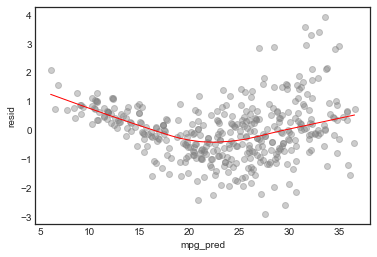

In [60]:
# add residuals to df
model_df['resid'] = model.resid


# plot
plt.ylabel('standardized resid')
sns.regplot(model_df.mpg_pred, model_df.resid/model_df.resid.std(), lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})

### Standardized residuals QQ-plot

Text(0.5,0,'standard normal quantiles')

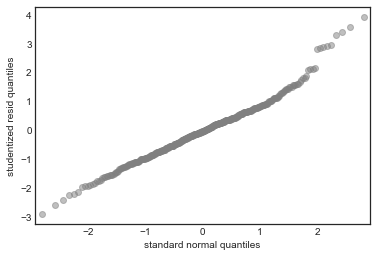

In [58]:
sm.qqplot(model_df.resid/model_df.resid.std(), color='grey', alpha=0.5, xlabel='')
plt.ylabel('studentized resid quantiles')
plt.xlabel('standard normal quantiles')

### Scale-location plot

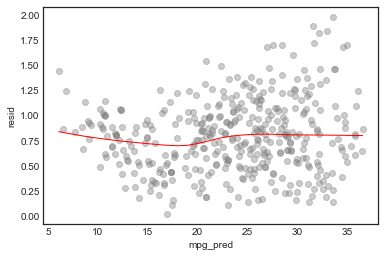

In [59]:
plt.ylabel('√|standardized resid|')
sns.regplot(model_df.mpg_pred, np.sqrt(np.abs(model_df.resid/model_df.resid.std())), lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})

### Influence Plot

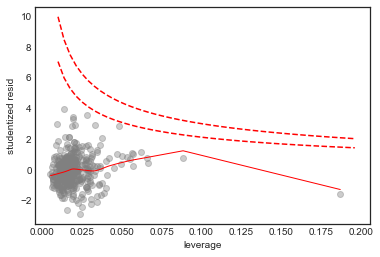

In [18]:
# influence plot
axes = sns.regplot(model.get_influence().hat_matrix_diag, model_df.resid/model_df.resid.std(), 
            lowess=True, 
            line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'grey', 'edgecolors':'grey', 'alpha':0.4})
plt.xlabel('leverage')
plt.ylabel('studentized resid')
x = np.linspace(0.01, axes.get_xlim()[1], 50)
plt.plot(x, np.sqrt(0.5*(1 - x)/x), color='red', linestyle='dashed')
plt.plot(x, np.sqrt((1 - x)/x), color='red', linestyle='dashed')

From these diagnostic plots we conclude

- There is non-linearity in the data
- There are a handful of outliers (studentized residual $\geqslant$ 3)
- The normality assumption is appropriate
- The data shows heteroscedasticity
- There are no high influence points

## (e) Interaction effects

We are told to use the `*` and `~` R operators to investigate interaction effects. Thankfully [statmodels has support for these](http://www.statsmodels.org/devel/example_formulas.html). 

To use `:
`, we will fit a model consisting of only pairwise interaction terms $X_iX_j$

In [19]:
import itertools as it
import statsmodels.formula.api as smf


# generate formula for interaction terms 
names = list(auto.columns.drop('name').drop('mpg'))
pairs = list(it.product(names, names))
terms  = [name1 + ' : ' + name2 for (name1, name2) in pairs if name1 != name2]
formula = 'mpg ~ '

for term in terms:
    formula += term + ' + '
formula = formula[:-3]
formula

'mpg ~ cylinders : displacement + cylinders : horsepower + cylinders : weight + cylinders : acceleration + cylinders : year + cylinders : origin + displacement : cylinders + displacement : horsepower + displacement : weight + displacement : acceleration + displacement : year + displacement : origin + horsepower : cylinders + horsepower : displacement + horsepower : weight + horsepower : acceleration + horsepower : year + horsepower : origin + weight : cylinders + weight : displacement + weight : horsepower + weight : acceleration + weight : year + weight : origin + acceleration : cylinders + acceleration : displacement + acceleration : horsepower + acceleration : weight + acceleration : year + acceleration : origin + year : cylinders + year : displacement + year : horsepower + year : weight + year : acceleration + year : origin + origin : cylinders + origin : displacement + origin : horsepower + origin : weight + origin : acceleration + origin : year'

In [20]:
# fit a regression model with only interaction terms
pair_int_model = smf.ols(formula=formula, data=auto).fit()

And find the statisitcally significant interactions

In [21]:
# show interactions with p value less than 0.05
pair_int_model.pvalues[pair_int_model.pvalues < 5e-2]

Intercept                    0.005821
cylinders:year               0.014595
displacement:acceleration    0.010101
displacement:year            0.000036
displacement:origin          0.015855
weight:acceleration          0.005177
acceleration:year            0.000007
year:origin                  0.045881
dtype: float64

Now to use `+` we fit a model consisting of all features $X_i$ and all possible interactions 

In [22]:
# generate formula for interaction terms 
names = list(auto.columns.drop('name').drop('mpg'))
formula = 'mpg ~ '
for name in names:
    formula += name + '*'
formula = formula[:-1]
formula

'mpg ~ cylinders*displacement*horsepower*weight*acceleration*year*origin'

In [23]:
# fit a regression model with all features and all possible interaction terms
full_int_model = smf.ols(formula=formula, data=auto).fit()

Finally, we find the statistically significant terms

In [24]:
full_int_model.pvalues[full_int_model.pvalues < 0.05]

Series([], dtype: float64)

In this case, including all possible interactions has led to none of them being statistically significant, even the pairwise interactions.

## (f) Variable transformations

We'll try the suggested variable transformations $\log(X), \sqrt{X}, X^2$.

In [25]:
# drop constant before transformation, else const for log(X) will be zero
X = X.drop('const', axis=1)

In [26]:
import numpy as np
import statsmodels.api as sm

# transform data
log_X = np.log(X)
sqrt_X = np.sqrt(X)
X_sq = X**2

# fit models with constants
log_model = sm.OLS(Y, sm.add_constant(log_X)).fit()
sqrt_model = sm.OLS(Y, sm.add_constant(sqrt_X)).fit()
sq_model = sm.OLS(Y, sm.add_constant(X_sq)).fit()

Now we'll look at each of these models individually:

### The $\log(X)$ model

In [27]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     310.3
Date:                Sun, 28 Oct 2018   Prob (F-statistic):          6.92e-155
Time:                        19:28:07   Log-Likelihood:                -1005.5
No. Observations:                 397   AIC:                             2027.
Df Residuals:                     389   BIC:                             2059.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -67.0838     17.433     -3.848      0.000    -101.358     -32.810
cylinders        1.8114      1.658      1.093      0.275      -1.448       5.070
displacement    -1.0935      1.540     -0.710      0.478      -4.121       1.934
horsepower      -6.2631      1.528     -4.100      0.000      -9.267      -3.259
weight         -13.4966      2.185     -6.178      0.000     -17.792      -9.201
acceleration    -4.3687      1.577     -2.770      0.006      -7.469      -1.268
year            55.5963      3.540     15.704      0.000      48.636      62.557
origin           1.5763      0.506      3.118      0.002       0.582       2.570
==============================================================================
Omnibus:                       39.413   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.214
Skew:                           0.576   Prob(JB):                     2.82e-17
Kurtosis:                       4.812   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Very large $R^2$ and very low p-value for the $F$-statistic suggest this is a useful model. Interestingly, this model gives very large $p$-values for the features `cylinders` and `displacement`.

The statistically significant features of the the original and log models and their p-values

In [28]:
stat_sig_df = pd.concat([model.pvalues[is_stat_sig], log_model.pvalues[is_stat_sig]], join='outer', axis=1, sort=False)
stat_sig_df = stat_sig_df.rename({0 : 'model_pval', 1: 'log_model_pval'}, axis='columns')
stat_sig_df

,model_pval,log_model_pval
const,1.097017e-04,1.390585e-04
displacement,9.455004e-03,4.780250e-01
weight,3.578587e-22,1.641584e-09
year,2.502539e-40,2.150054e-43
origin,4.530034e-07,1.958604e-03


The insignificant features and p-values are

In [29]:
stat_sig_df = pd.concat([model.pvalues[~ is_stat_sig], log_model.pvalues[~ is_stat_sig]], join='outer', axis=1, sort=False)
stat_sig_df = stat_sig_df.rename({0 : 'model_pval', 1: 'log_model_pval'}, axis='columns')
stat_sig_df

,model_pval,log_model_pval
cylinders,0.158026,0.275162
horsepower,0.321204,0.000050
acceleration,0.307759,0.005869


So the original and log models are in total agreement about which features are significant! 

Let's look at prediction accuracy.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the data
X_train, X_test, y_train, y_test = train_test_split(auto.drop(['name', 'mpg'], axis=1).dropna(), auto.mpg)

# transform
log_X_train, log_X_test = np.log(X_train), np.log(X_test)

# train models
reg_model = LinearRegression().fit(X_train, y_train)
log_model = LinearRegression().fit(log_X_train, y_train)

# get train mean squared errors
reg_train_mse = mean_squared_error(y_train, reg_model.predict(X_train))
log_train_mse = mean_squared_error(y_train, log_model.predict(log_X_train))

print("The reg model train mse is {} and the log model train mse is {}".format(round(reg_train_mse, 3), round(log_train_mse, 3)))

# get test mean squared errors
reg_test_mse = mean_squared_error(y_test, reg_model.predict(X_test))
log_test_mse = mean_squared_error(y_test, log_model.predict(log_X_test))

print("The reg model test mse is {} and the log model test mse is {}".format(round(reg_test_mse, 3), round(log_test_mse, 3)))

The reg model train mse is 11.111 and the log model train mse is 9.496
The reg model test mse is 10.434 and the log model test mse is 8.83


From a prediction standpoint, the $log(X)$ model is an improvement

### The $\sqrt{X}$ model

In [35]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     279.5
Date:                Sun, 28 Oct 2018   Prob (F-statistic):          1.76e-147
Time:                        19:29:40   Log-Likelihood:                -1023.0
No. Observations:                 397   AIC:                             2062.
Df Residuals:                     389   BIC:                             2094.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -51.9765      9.138     -5.688      0.000     -69.942     -34.011
cylinders       -0.0144      1.535     -0.009      0.993      -3.031       3.003
displacement     0.2176      0.229      0.948      0.344      -0.234       0.669
horsepower      -0.6775      0.303     -2.233      0.026      -1.274      -0.081
weight          -0.6471      0.078     -8.323      0.000      -0.800      -0.494
acceleration    -0.5983      0.821     -0.729      0.467      -2.212       1.016
year            12.9347      0.854     15.139      0.000      11.255      14.614
origin           3.2448      0.763      4.253      0.000       1.745       4.745
==============================================================================
Omnibus:                       38.601   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.511
Skew:                           0.589   Prob(JB):                     8.05e-16
Kurtosis:                       4.677   Cond. No.                     3.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2$ value is slightly less than for the log model, but not much, and the F-statistic p-value is comparable. 
This model doesn't like `cylinder` and `displacement` just like the regular and log models, but also rejects `acceleration`. 

Now we'll check prediction accuracy

In [53]:
# transform
sqrt_X_train, sqrt_X_test = np.sqrt(X_train), np.sqrt(X_test)

# train sqrt model
sqrt_model = LinearRegression().fit(sqrt_X_train, y_train)

# get train mean squared errors
reg_train_mse = mean_squared_error(y_train, reg_model.predict(X_train))
sqrt_train_mse = mean_squared_error(y_train, sqrt_model.predict(sqrt_X_train))

print("The reg model train mse is {} and the sqrt model train mse is {}".format(round(reg_train_mse, 3), round(sqrt_train_mse, 3)))

# get test mean squared errors
reg_test_mse = mean_squared_error(y_test, reg_model.predict(X_test))
sqrt_test_mse = mean_squared_error(y_test, sqrt_model.predict(sqrt_X_test))

print("The reg model test mse is {} and the sqrt model test mse is {}".format(round(reg_test_mse, 3), round(sqrt_test_mse, 3)))

The reg model train mse is 11.111 and the sqrt model train mse is 10.365
The reg model test mse is 10.434 and the sqrt model test mse is 9.635


Again, the $\sqrt{X}$ model is better at prediction

### The $X^2$ model

In [47]:
sq_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.3
Date:                Sun, 28 Oct 2018   Prob (F-statistic):          8.35e-131
Time:                        19:38:32   Log-Likelihood:                -1062.3
No. Observations:                 397   AIC:                             2141.
Df Residuals:                     389   BIC:                             2172.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9215      2.352      0.392      0.695      -3.702       5.546
cylinders       -0.0864      0.025     -3.431      0.001      -0.136      -0.037
displacement  5.672e-05   1.39e-05      4.092      0.000    2.95e-05     8.4e-05
horsepower   -2.945e-05   4.98e-05     -0.591      0.555      -0.000    6.85e-05
weight       -9.535e-07   8.95e-08    -10.653      0.000   -1.13e-06   -7.77e-07
acceleration     0.0066      0.003      2.466      0.014       0.001       0.012
year             0.0050      0.000     14.360      0.000       0.004       0.006
origin           0.4110      0.069      5.956      0.000       0.275       0.547
==============================================================================
Omnibus:                       20.163   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.033
Skew:                           0.421   Prob(JB):                     1.35e-06
Kurtosis:                       3.961   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Slightly lower $R^2$ and higher $F$-statistic pvalue than previous, but seems negligible (in all cases the $F$-statistic pvalue is effectively zero)

Let's check prediction accuracy

In [55]:
# transform
X_sq_train, X_sq_test = X_train**2, X_test**2

# train sqrt model
sq_model = LinearRegression().fit(X_sq_train, y_train)

# get train mean squared errors
reg_train_mse = mean_squared_error(y_train, reg_model.predict(X_train))
sq_train_mse = mean_squared_error(y_train, sq_model.predict(X_sq_train))

print("The reg model train mse is {} and the sq model train mse is {}".format(round(reg_train_mse, 3), round(sq_train_mse, 3)))

# get test mean squared errors
reg_test_mse = mean_squared_error(y_test, reg_model.predict(X_test))
sq_test_mse = mean_squared_error(y_test, sq_model.predict(sq_X_test))

print("The reg model test mse is {} and the sq model test mse is {}".format(round(reg_test_mse, 3), round(sq_test_mse, 3)))

The reg model train mse is 11.111 and the sq model train mse is 12.571
The reg model test mse is 10.434 and the sq model test mse is 12.0


So the $X^2$ model is not as good at predicting as any of the other models